In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [12]:
df = pd.read_csv('./movies_sentiment_data (1).csv')
df = df.drop(['sentiment'],axis=1)
df.head()

,review
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...
1,I enjoyed the movie and the story immensely! I...
2,I had a hard time sitting through this. Every ...
3,It's hard to imagine that anyone could find th...
4,This is one military drama I like a lot! Tom B...


In [14]:
clf=Pipeline([
    ('cv',TfidfVectorizer()),
    ('km',KMeans(n_clusters=2, random_state=0)),
])
clf.fit(df['review'])

c:\Users\ocamj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('cv', TfidfVectorizer()),
                ('km', KMeans(n_clusters=2, random_state=0))])

In [17]:
clustered_data = pd.DataFrame({'Review': df['review'], 'Cluster': clf.predict(df['review'])})

clustered_data

,Review,Cluster
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,1
1,I enjoyed the movie and the story immensely! I...,0
2,I had a hard time sitting through this. Every ...,1
3,It's hard to imagine that anyone could find th...,1
4,This is one military drama I like a lot! Tom B...,0
...,...,...
18995,- Bad Stuff: This movie is real crap. Bad stun...,1
18996,"If you've seen the trailer for this movie, you...",1
18997,This has to be the all time best computer anim...,0
18998,I've seen 'NSNA' just after I've seen all Roge...,1


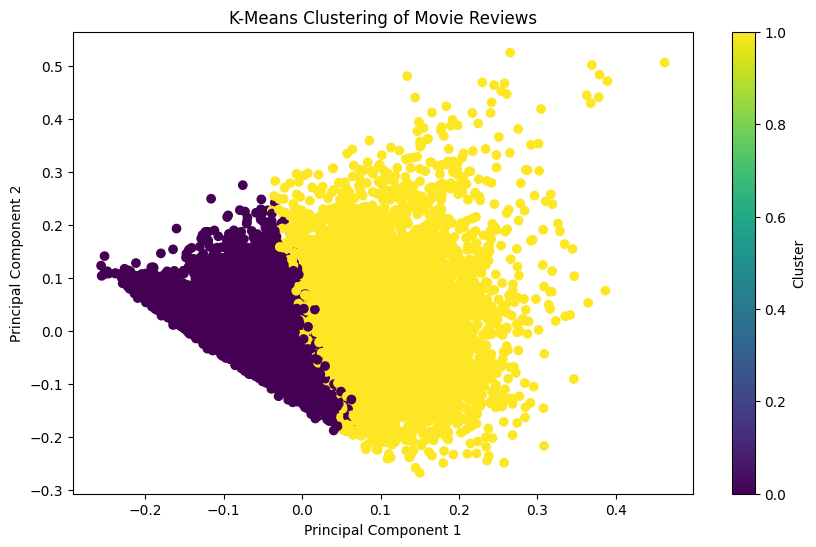

In [19]:
tfidf_features = clf.named_steps['cv'].transform(df['review'])

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(tfidf_features.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clustered_data['Cluster'], cmap='viridis', marker='o')
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering of Movie Reviews')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()